<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

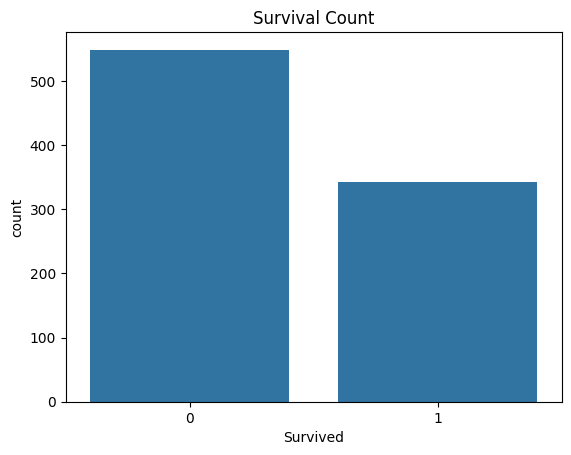

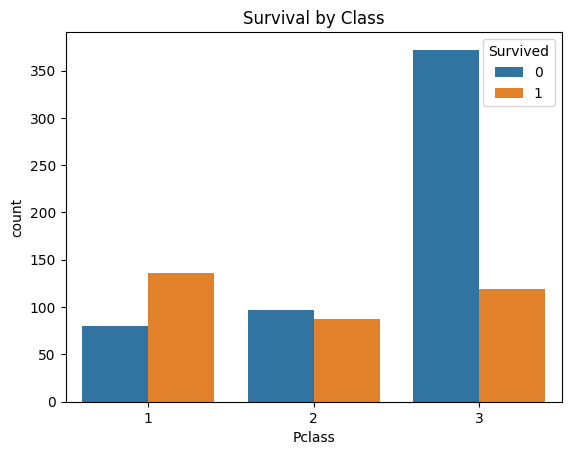

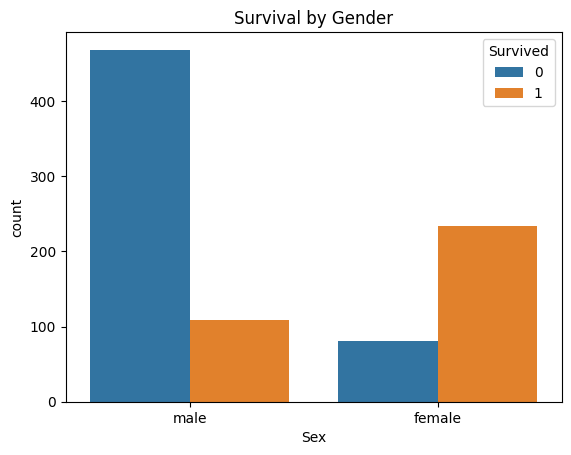

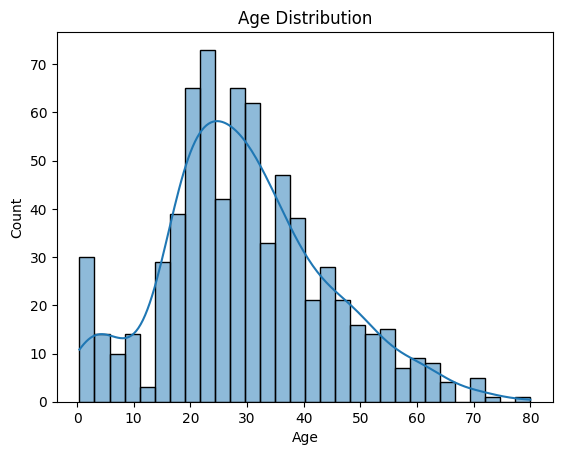

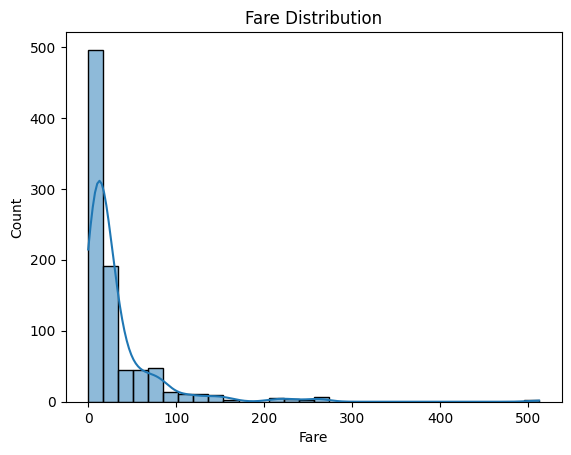

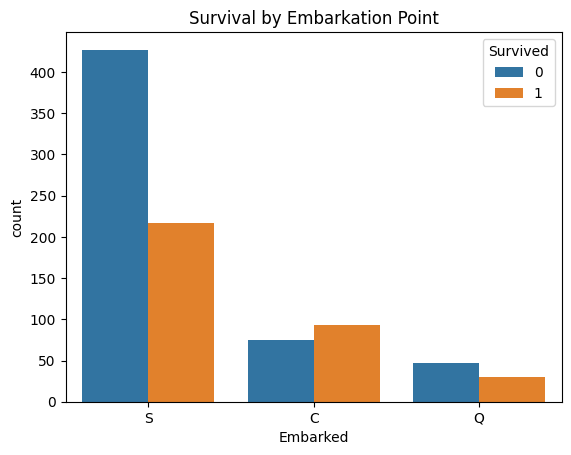

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Titanic-Dataset.csv')

# Basic information
print(data.info())
print(data.describe())
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Visualizations
sns.countplot(x='Survived', data=data)
plt.title('Survival Count')
plt.show()

sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival by Class')
plt.show()

sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival by Gender')
plt.show()

sns.histplot(data=data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(data=data, x='Fare', bins=30, kde=True)
plt.title('Fare Distribution')
plt.show()

sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival by Embarkation Point')
plt.show()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Drop unnecessary columns and handle missing values
data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Define features and target variable
X = data.drop(columns='Survived')
y = data['Survived']

# Preprocessing pipelines
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Pclass', 'Sex', 'Embarked']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

X = preprocessor.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f'Random Forest Accuracy: {rf_accuracy}')
print('Random Forest Confusion Matrix:')
print(confusion_matrix(y_test, rf_pred))
print('Random Forest Classification Report:')
print(classification_report(y_test, rf_pred))

# Support Vector Machine
svc = SVC(random_state=42)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_pred)
print(f'SVM Accuracy: {svc_accuracy}')
print('SVM Confusion Matrix:')
print(confusion_matrix(y_test, svc_pred))
print('SVM Classification Report:')
print(classification_report(y_test, svc_pred))

# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
print(f'Logistic Regression Accuracy: {lr_accuracy}')
print('Logistic Regression Confusion Matrix:')
print(confusion_matrix(y_test, lr_pred))
print('Logistic Regression Classification Report:')
print(classification_report(y_test, lr_pred))

# Cross-validation for model comparison
rf_cv_scores = cross_val_score(rf, X, y, cv=5)
svc_cv_scores = cross_val_score(svc, X, y, cv=5)
lr_cv_scores = cross_val_score(lr, X, y, cv=5)

print(f'Random Forest CV Accuracy: {np.mean(rf_cv_scores)}')
print(f'SVM CV Accuracy: {np.mean(svc_cv_scores)}')
print(f'Logistic Regression CV Accuracy: {np.mean(lr_cv_scores)}')


Random Forest Accuracy: 0.8268156424581006
Random Forest Confusion Matrix:
[[92 13]
 [18 56]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

SVM Accuracy: 0.8156424581005587
SVM Confusion Matrix:
[[92 13]
 [20 54]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Logistic Regression Accuracy: 0.7988826815642458
Logistic Regression Confusion Matrix:
[[90 15]
 [21 53]]
Logistic